In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loads the data and the maps.
stations_catalog = pd.read_csv('Station_Data/HFNodal_stations.v3.csv')
eq_catalog = pd.read_csv('Station_Data/HFNodal_earthquakes.csv')
zoomed_im = plt.imread('Berkeley_Maps/zoomed_map.png')
large_im = plt.imread('Berkeley_Maps/large_map.png')

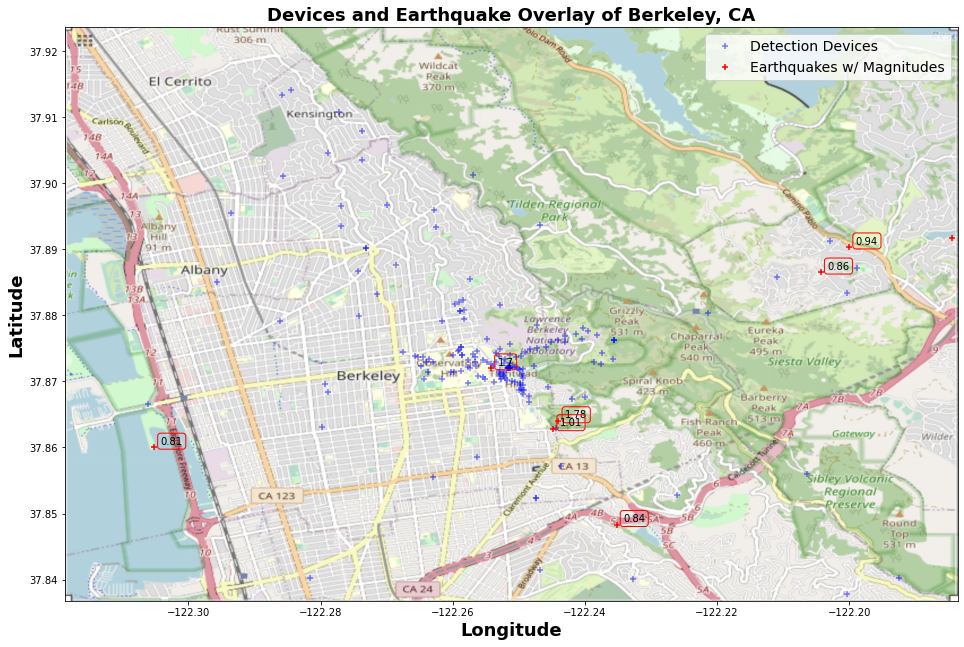

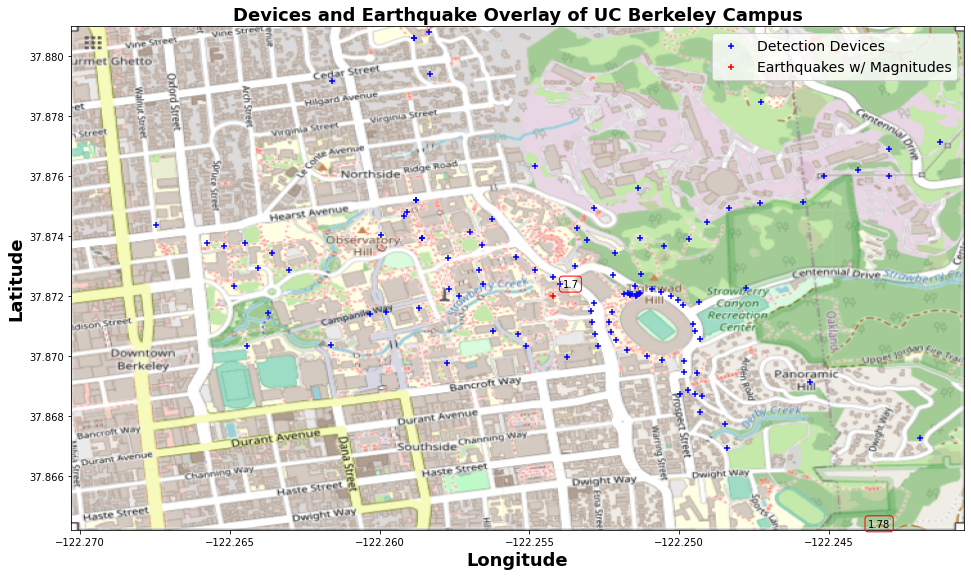

In [3]:
### Large Berkeley map
plt.figure(figsize=(16, 11))
plt.scatter(stations_catalog['Longitude'], stations_catalog['Latitude'], marker='+', alpha=.5, color='blue', label="Detection Devices")
plt.scatter(eq_catalog['longitude'], eq_catalog['latitude'], marker='+', color='red', alpha=1, label='Earthquakes w/ Magnitudes')

# Creates text boxes next to the earthquakes providing the magnitude.
for i in range(len(eq_catalog['longitude'])):
    if (eq_catalog['longitude'][i] < -122.1836) & (eq_catalog['longitude'][i] > -122.3187):
        plt.annotate(text=eq_catalog['magnitude'][i], xy=(eq_catalog['longitude'][i] + .001, eq_catalog['latitude'][i] + .0005),
                     bbox=dict(facecolor='none', edgecolor='red', boxstyle='round'), size=10)

plt.legend(fontsize=14)
plt.xlabel('Longitude', fontsize=18,weight='bold')
plt.ylabel('Latitude', fontsize=18, weight='bold')
plt.title('Devices and Earthquake Overlay of Berkeley, CA', fontsize=18, weight='bold')
plt.imshow(large_im, extent=[-122.3187, -122.1836, 37.8368, 37.9237])


### Zoomed-in Berkeley map
plt.figure(figsize=(16, 11))
plt.scatter(stations_catalog['Longitude'], stations_catalog['Latitude'], marker='+', alpha=1, color='blue', label="Detection Devices")
plt.scatter(eq_catalog['longitude'], eq_catalog['latitude'], marker='+', color='red', alpha=1, label='Earthquakes w/ Magnitudes')

# Creates text boxes next to the earthquakes providing the magnitude.
for i in range(len(eq_catalog['longitude'])):
    if (eq_catalog['longitude'][i] < -122.2405) & (eq_catalog['longitude'][i] > -122.2703):
        plt.annotate(text=eq_catalog['magnitude'][i], xy=(eq_catalog['longitude'][i] + .0003, eq_catalog['latitude'][i] + .0003),
                     bbox=dict(facecolor='none', edgecolor='red', boxstyle='round'), size=10)


plt.legend(fontsize=14)
plt.xlabel('Longitude', fontsize=18,weight='bold')
plt.ylabel('Latitude', fontsize=18, weight='bold')
plt.title('Devices and Earthquake Overlay of UC Berkeley Campus', fontsize=18, weight='bold')
plt.ticklabel_format(useOffset=False)
plt.imshow(zoomed_im, extent=[-122.2703, -122.2405, 37.8642, 37.8810])

In [4]:
# There are 8 duplicate magnitudes. I think these duplicates are mostly out of view / not around
# many detection devices so it should not be an issue. Should still think of a way to incorporate 
# them into the function.

# Finds and stores all the duplicate magnitudes.
# import collections
# test = [item for item, count in collections.Counter(eq_catalog['magnitude']).items() if count > 1]
# print(len(test))
# eq_catalog.loc[eq_catalog['magnitude'] == test[3]]

def earthquake_finder(eq_catalog, magnitude):    
    return eq_catalog.loc[eq_catalog['magnitude'] == magnitude]

In [5]:
''' This function finds the Euclidean distance (L2 norm) from the given earthquake to 
all stations and returns the n nearest stations from the earthquake. '''

def station_finder(eq, stations_catalog, num_stations):
    dist_dict = {}
    eq_lat = eq['latitude']
    eq_long = eq['longitude'] 
    
    # Stores the L2 norm between each station in the stations_catalog and the given earthquake in a 
    # dictionary whose keys are the station's index.
    for i in range(len(stations_catalog['Latitude'])):
        dist_dict[str(i)] = ([np.linalg.norm(np.array(eq_long, eq_lat) -
                                          np.array(stations_catalog['Longitude'][i], stations_catalog['Latitude'][i])), i])
    
    # Sorts the dictionary by smallest distance and returns the keys of the n smallest stations.
    sorted_keys = sorted(dist_dict, key=dist_dict.get)[:num_stations]
    
    return stations_catalog.iloc[list(map(int, sorted_keys))]
  

In [6]:
strawberry_creek_eq = earthquake_finder(eq_catalog, magnitude=1.7)

strawberry_creek_stations = station_finder(strawberry_creek_eq, stations_catalog, 4)
strawberry_creek_stations

,site_name,site_code,Latitude,Longitude,station_code,handheld-id,note,Unnamed: 7
65,Lewis Hall 3,B052,37.87265,-122.25420,4021,TT-1-1066,sensor still working,NaN
68,Chou Hall,B055,37.87239,-122.25398,1312,TT-1-1069,NaN,NaN
72,2215 College Ave,B059,37.86998,-122.25375,5546,TT-1-1073,NaN,NaN
66,Lewis Hall 2,B053,37.87288,-122.25480,4008,TT-1-1067,noisy,NaN


In [7]:
path = '/global/scratch/users/taira/mleq/mseed/'
collected_data = !ls /global/scratch/users/taira/mleq/mseed/

In [8]:
# Returns a dictionary whose keys are the station numbers and the items are the corresponding E,N,Z files.

def data_sorter(data):
    sorted_dict = {}
    
    for i in range(len(data)):
        if (i % 3 == 0):
            sorted_dict[str(data[i].split('.')[0])] = data[i:i+3]
    
    return sorted_dict 

In [9]:
sorted_dict = data_sorter(collected_data)

In [10]:
sorted_dict.keys()

dict_keys(['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '1100', '1101', '1102', '1201', '1202', '1203', '1204', '1205', '1206', '1207', '1208', '1209', '1210', '1211', '1212', '1213', '1214', '1215', '1216', '1217', '1301', '1302', '1303', '9101', '9102

In [11]:
sorted_dict['9234']

['9234.HF.EPE.00.2020.342',
 '9234.HF.EPN.00.2020.342',
 '9234.HF.EPZ.00.2020.342']

In [12]:
sorted_dict['1001']

['1001.HF.EPE.00.2020.342',
 '1001.HF.EPN.00.2020.342',
 '1001.HF.EPZ.00.2020.342']